In [1]:
options(jupyter.log_level = 2L)
source("de.R")

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
sample_name <- "02_SL"  # "10_S"
kallisto_dir <- sprintf('/data/bio/usz/kallisto/%s/kallisto', sample_name)  #20180329.A-Plate_8_N722_S516'
#clonality_file <- sprintf('/home/pesho/repos/bioviz/in/clonality/clonality_%s.json', sample_name)

# TODO: toy
clonality_file <- sprintf('/home/pesho/repos/bioviz/in/clonality/clonality_%s_toy.json', sample_name)

table <- DE_e2e(sample_name, kallisto_dir, clonality_file, "ROTS", "file")
#sce_groups <- readSamples(sample_name, kallisto_dir, clonality_file, "ROTS", "file")
#sce = sce_groups[["sce"]]
#groups = sce_groups[["groups"]]

ERROR: Error in DE_e2e(sample_name, kallisto_dir, clonality_file, "ROTS", "file"): could not find function "DE_e2e"


In [106]:
summary(table, fdr=0.5)

ROTS results: 

Number of resamplings:  100 

a1:                     2.2 
a2:                     1 
Top list size:          260 
Reproducibility value:  0.6239231 
Z-score:                11.79234 

3247 rows satisfy the condition. Only ten first rows are 
 displayed, see the return value for the whole output.
            Row ROTS-statistic pvalue FDR
RPL30     10632      -6.657391      0   0
NBAS       8010      -6.611972      0   0
S100A11   10888      -6.432954      0   0
RPL19     10580      -6.415594      0   0
RPS16     10714      -6.085989      0   0
ITK        6300      -5.913512      0   0
MTRNR2L12  7833      -5.883218      0   0
RPL23     10603      -5.834370      0   0
TRAV6     13156      -5.833201      0   0
S100A6    10890      -5.774085      0   0
... 


ERROR: Error in plot.ROTS(table): Plot type not selected. The options are: 'volcano', 'heatmap', 'ma', 'reproducibility', 'pvalue', 'pca'


In [5]:
sce_gene <- summariseExprsAcrossFeatures(sce, exprs_values="counts", summarise_by="feature_id")
input <- clean.counts(counts(sce_gene), min.lib.size=1000, min.reads = 1, min.detected = 1)

Collapsing expression to 29451 features.

Using feature as id variables
Using feature as id variables


In [18]:
#data(upsSpikeIn)
#input = upsSpikeIn
#groups = c(rep(0,3), rep(1,3))
#input = cd
#dim(input)
groups_bool <- unlist(lapply(groups, function(x) return(x=='N')))
results = ROTS(data=input, groups=groups_bool, B=100, K=500, seed=1234, log=FALSE)

Bootstrapping samples
Optimizing parameters
Calculating p-values
Calculating FDR


In [97]:
#colnames(input)[ groups == 'C' ]
#colnames(input)[ groups == 'N' ]
summary(summary, fdr = 0.05)

Length  Class   Mode 
     0   NULL   NULL 

In [38]:
# crashes
cnts <- apply(
    cd,
    2,
    function(x) {
        storage.mode(x) <- 'integer'
        return(x)
    }
)
group = NULL
o.ifm <- scde::scde.error.models(
    counts = cnts,
    groups = group,
    n.cores = 1,
    threshold.segmentation = TRUE,
    save.crossfit.plots = FALSE,
    save.model.plots = FALSE,
    verbose = 1,
    min.size.entries = 2
)
#head(cd)
#head(cnts)

cross-fitting cells.
number of pairs:  190 
total number of pairs:  190 


cross-fitting 190 pairs:


building individual error models.


adjusting library size based on 73 entries
fitting cell models:
1 : N702_S515
2 : N702_S521
3 : N703_S517
4 : N704_S518
5 : N704_S520
6 : N705_S516
7 : N705_S520
8 : N706_S515
9 : N706_S516
10 : N706_S517
11 : N707_S517
12 : N711_S520
13 : N712_S513
14 : N712_S516
15 : N712_S517
16 : N712_S518
17 : N714_S520
18 : N715_S513
19 : N715_S515
20 : N715_S516
ERROR encountered in building a model for cell N702_S515 - skipping the cell. Error:
Error in checkSlotAssignment(object, name, value) : 
  assignment of an object of class “function” is not valid for slot ‘defineComponent’ in an object of class “FLXMRglmC”; is(value, "expression") is not TRUE

ERROR encountered in building a model for cell N702_S521 - skipping the cell. Error:
Error in checkSlotAssignment(object, name, value) : 
  assignment of an object of class “function” is not valid for slot ‘defineComponent’ in an object of class “FLXMRglmC”; is(value, "expression") is not TRUE

ERROR encountered in building a model for cell N703_S

In [42]:
# test crashes
library(scde)
data(pollen)
cd <- clean.counts(pollen)
print(cd)
## change verbose to 1 to get immediate feedback
knn <- knn.error.models(cd, k = ncol(cd)/4, n.cores = 1, min.count.threshold = 2, min.nonfailed = 5, max.model.plots = 10, min.size.entries = 100, verbose=1)

                       Hi_NPC_1 Hi_NPC_10 Hi_NPC_14 Hi_NPC_15 Hi_NPC_13
A1BG                          0         0        29         0       174
A2M                           0         0        11         0        63
A2MP1                         0         0         0         0         0
AAAS                          0         0       106       182         7
AACS                          0         0         0       116         0
AADAT                         0         0         0         5         0
AAGAB                         0         0         0         0         1
AAK1                         96         1        18         4         1
AAMDC                       472       228         0        10         0
AAMP                          0        16         0         0         0
AAR2                       2629         0         9       109         0
AARS                         20         0         0      2462         0
AARS2                         0         0         0      2730   

adjusting library size based on 100 entries


cell : calculating cell-cell similarities ... done


fitting cell models:
cell.1 : Hi_NPC_1
cell.2 : Hi_NPC_10
cell.3 : Hi_NPC_14
cell.4 : Hi_NPC_15
cell.5 : Hi_NPC_13
cell.6 : Hi_NPC_12
cell.7 : Hi_NPC_2
cell.8 : Hi_NPC_7
cell.9 : Hi_NPC_6
cell.10 : Hi_NPC_8
cell.11 : Hi_NPC_5
cell.12 : Hi_NPC_3
cell.13 : Hi_NPC_11
cell.14 : Hi_NPC_9
cell.15 : Hi_NPC_4
cell.16 : Hi_GW16_14
cell.17 : Hi_GW16_22
cell.18 : Hi_GW21_8
cell.19 : Hi_GW21+3_15
cell.20 : Hi_GW21+3_4
cell.21 : Hi_GW16_6
cell.22 : Hi_GW21+3_2
cell.23 : Hi_GW21+3_11
cell.24 : Hi_GW16_13
cell.25 : Hi_GW16_25
cell.26 : Hi_GW16_17
cell.27 : Hi_GW16_15
cell.28 : Hi_GW16_20
cell.29 : Hi_GW16_16
cell.30 : Hi_GW16_18
cell.31 : Hi_GW16_4
cell.32 : Hi_GW16_3
cell.33 : Hi_GW16_11
cell.34 : Hi_GW21_4
cell.35 : Hi_GW21_5
cell.36 : Hi_GW16_1
cell.37 : Hi_GW16_19
cell.38 : Hi_GW21_7
cell.39 : Hi_GW16_21
cell.40 : Hi_GW16_5
cell.41 : Hi_GW16_12
cell.42 : Hi_GW16_24
cell.43 : Hi_GW16_8
cell.44 : Hi_GW21_3
cell.45 : Hi_GW21_1
cell.46 : Hi_GW21_2
cell.47 : Hi_GW21+3_3
cell.48 : Hi_GW16_23
cell.49 : 

ERROR: Error in celld[ids[i], -i, drop = FALSE]: subscript out of bounds


In [29]:
data(es.mef.small)
#sg <- factor(gsub("(MEF|ESC).*", "\\1", colnames(es.mef.small)), levels = c("ESC", "MEF"))
#sg
#colnames(es.mef.small)
names(sg) <- colnames(es.mef.small)
table(sg)
cd <- clean.counts(es.mef.small, min.lib.size=1000, min.reads = 1, min.detected = 1)
#dim(es.mef.small)
#dim(cd)
#es.mef.small
o.ifm <- scde.error.models(counts = cd, groups = sg, n.cores = 1, threshold.segmentation = TRUE, save.crossfit.plots = FALSE, save.model.plots = FALSE, verbose = 1)
data(o.ifm)
head(o.ifm)
valid.cells <- o.ifm$corr.a > 0
table(valid.cells)

ERROR: Error in names(sg) <- colnames(es.mef.small): object 'sg' not found


In [127]:
#groups <- factor(gsub("(MEF|ESC).*", "\\1", rownames(o.ifm)), levels  =  c("ESC", "MEF"))

o.prior <- scde.expression.prior(models = o.ifm, counts = cd, length.out = 400, show.plot = FALSE)
groups <- factor(gsub("(MEF|ESC).*", "\\1", rownames(o.ifm)), levels  =  c("ESC", "MEF"))
#groups
ediff <- scde.expression.difference(o.ifm, cd, o.prior, groups  =  groups, n.randomizations  =  100, n.cores  =  1, verbose  =  1)

[1] ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC ESC
[20] ESC MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF MEF
[39] MEF MEF
Levels: ESC MEF

comparing groups:

ESC MEF 
 20  20 
calculating difference posterior
summarizing differences


In [12]:
counts <- matrix(rpois(100, lambda = 10), ncol=10, nrow=10)
rownames(counts) <- paste("gene", 1:10, sep = "")
colnames(counts) <- paste("cell", 1:10, sep = "")
sce <- SingleCellExperiment(
    assays = list(counts = counts),
    rowData = data.frame(gene_names = paste("gene_name", 1:10, sep = "")),
    colData = data.frame(cell_names = paste("cell_name", 1:10, sep = ""))
)
normcounts(sce) <- log2(counts(sce) + 1)
sce

class: SingleCellExperiment 
dim: 10 10 
metadata(0):
assays(2): counts normcounts
rownames(10): gene1 gene2 ... gene9 gene10
rowData names(1): gene_names
colnames(10): cell1 cell2 ... cell9 cell10
colData names(1): cell_names
reducedDimNames(0):
spikeNames(0):

In [27]:
counts(sce)
normcounts(sce)

,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10
gene1,10,14,6,6,14,14,5,9,9,9
gene2,10,12,12,7,13,8,12,11,8,13
gene3,12,7,6,7,11,9,14,13,12,8
gene4,10,12,6,14,9,9,11,6,11,7
gene5,11,16,10,10,10,13,9,10,5,9
gene6,10,10,9,11,10,16,10,15,16,8
gene7,13,15,13,14,12,8,9,14,5,11
gene8,8,11,16,12,14,15,17,6,10,10
gene9,15,12,9,9,18,6,9,14,7,8
gene10,14,8,12,10,11,18,13,6,6,13


,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10
gene1,3.459432,3.906891,2.807355,2.807355,3.906891,3.906891,2.584963,3.321928,3.321928,3.321928
gene2,3.459432,3.700440,3.700440,3.000000,3.807355,3.169925,3.700440,3.584963,3.169925,3.807355
gene3,3.700440,3.000000,2.807355,3.000000,3.584963,3.321928,3.906891,3.807355,3.700440,3.169925
gene4,3.459432,3.700440,2.807355,3.906891,3.321928,3.321928,3.584963,2.807355,3.584963,3.000000
gene5,3.584963,4.087463,3.459432,3.459432,3.459432,3.807355,3.321928,3.459432,2.584963,3.321928
gene6,3.459432,3.459432,3.321928,3.584963,3.459432,4.087463,3.459432,4.000000,4.087463,3.169925
gene7,3.807355,4.000000,3.807355,3.906891,3.700440,3.169925,3.321928,3.906891,2.584963,3.584963
gene8,3.169925,3.584963,4.087463,3.700440,3.906891,4.000000,4.169925,2.807355,3.459432,3.459432
gene9,4.000000,3.700440,3.321928,3.321928,4.247928,2.807355,3.321928,3.906891,3.000000,3.169925
gene10,3.906891,3.169925,3.700440,3.459432,3.584963,4.247928,3.807355,2.807355,2.807355,3.807355


In [14]:
counts <- matrix(rpois(100, lambda = 10), ncol=10, nrow=10)
rownames(counts) <- paste("gene", 1:10, sep = "")
colnames(counts) <- paste("cell", 1:10, sep = "")
sce <- SingleCellExperiment(assays = list(counts = counts))
sce

class: SingleCellExperiment 
dim: 10 10 
metadata(0):
assays(1): counts
rownames(10): gene1 gene2 ... gene9 gene10
rowData names(0):
colnames(10): cell1 cell2 ... cell9 cell10
colData names(0):
reducedDimNames(0):
spikeNames(0):

In [ ]:
setwd("/home/pesho/tmp/kallisto/")
system("wc -l targets.txt")
ave_frag_len <- mean(c(855, 860, 810, 760, 600, 690, 770, 690))

kallisto_test <- runKallisto("targets.txt",
                             "Mus_musculus.GRCm38.rel79.cdna.all.ERCC.idx",
                             output_prefix="kallisto_output_Mmus", n_cores=12,
                             fragment_length=ave_frag_len, verbose=TRUE)

Warning message in eval(ei, envir):
“de.R: Not exact number of arguments. Expected 2 args: directory with gene tables, outfile(for a DE table)”

2018-05-09 17:35:51 INFO::Found 8 DE tables in ~/work/CellDive/tmp/de/
2018-05-09 17:35:51 INFO::Sourced 7 DE tables:
[1] "DE_01_BL" "DE_01_SE" "DE_02_BL" "DE_02_SL" "DE_03_SE" "DE_03_SL" "DE_08_S" 
    DE_01_BL DE_01_SE DE_02_BL DE_02_SL DE_03_SE DE_03_SL DE_08_S
1          1        0        0        1        0        0       0
2          1        0        0        1        0        0       0
3          1        0        0        0        0        0       0
4          1        0        0        1        0        0       0
5          1        0        0        1        0        0       0
6          1        0        0        0        0        0       0
7          1        0        0        0        0        0       0
8          1        0        0        0        0        0       0
9          1        0        0        0        0        0       0
10         1        0        0        0        0        0       0
11         1        0        0        0        0        0       0
12       

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'xlim' values


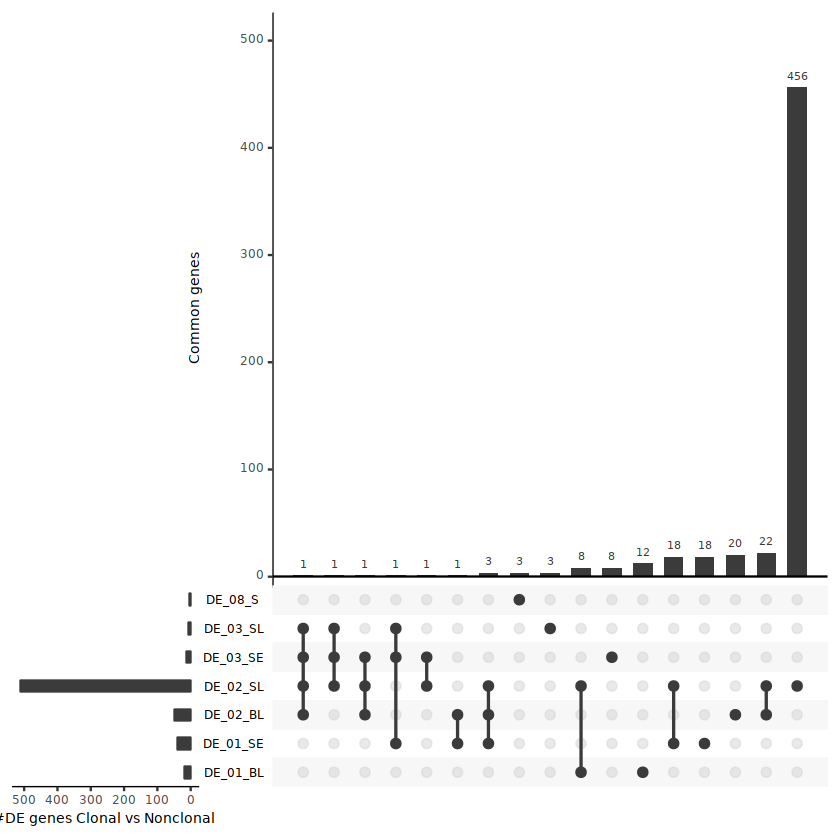

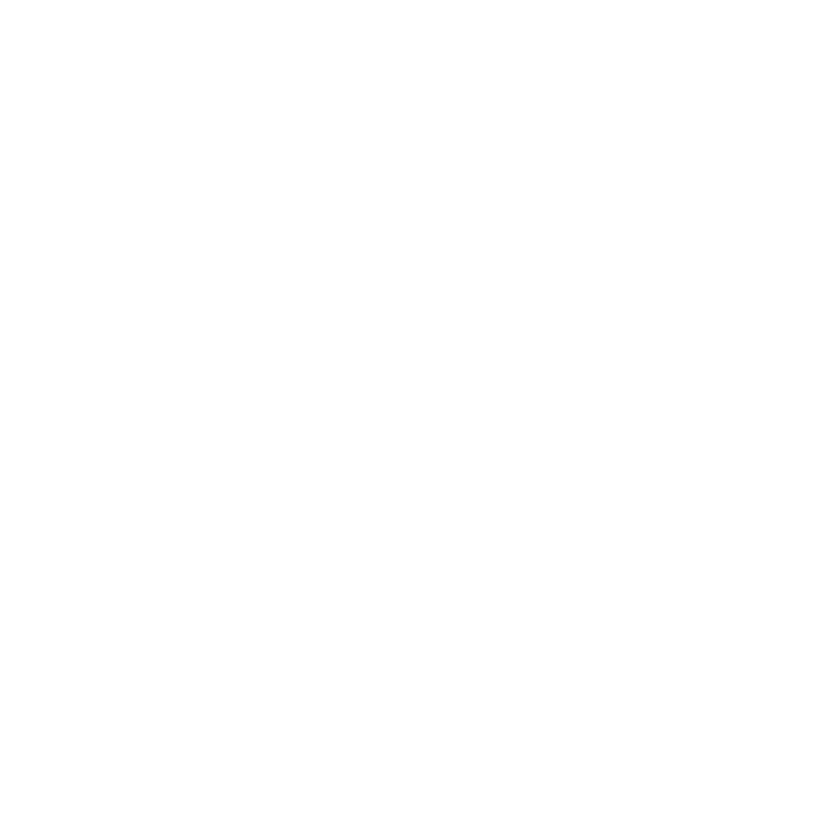

In [9]:
source("upset.R")
Dir2UpSet(dir="~/work/CellDive/tmp/de/", outfile = "~/work/CellDive/tmp/de.png")